In [39]:
from astropy.io.fits import getdata, getheader
import astropy.units as u
from nustar_lunar_pointing.tracking import get_epoch_tle
from nustar_lunar_pointing.tracking import convert_nustar_time
from nustar_lunar_pointing.tracking import get_moon_j2000
from astropy.time import Time


import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
from datetime import datetime

checktime = datetime.strptime('2017-05-08', "%Y-%m-%d")
tlefile = '../data/NuSTAR.tle'
mindt, line1, line2 = get_epoch_tle(checktime, tlefile)
print('Days between TLE entry and when you want to observe: ', mindt)

Days between TLE entry and when you want to observe:  15


In [4]:
from astropy.coordinates import SkyCoord
from datetime import timedelta
ra = []
dec =[]
times= []
base_ra = None
base_dec = None

step_size = timedelta(0, 1000.) # 1000 second steps
checktime = datetime.strptime('2017-05-08', "%Y-%m-%d")
end_check = datetime.strptime('2017-05-10', "%Y-%m-%d")


while ( (end_check - checktime).total_seconds() ) > 0:
    checktime += step_size
        
    ra_moon, dec_moon = get_moon_j2000(checktime, line1, line2)

    times.extend([checktime])
    ra.extend([ra_moon.value])
    dec.extend([dec_moon.value])
    

<IPython.core.display.Javascript object>


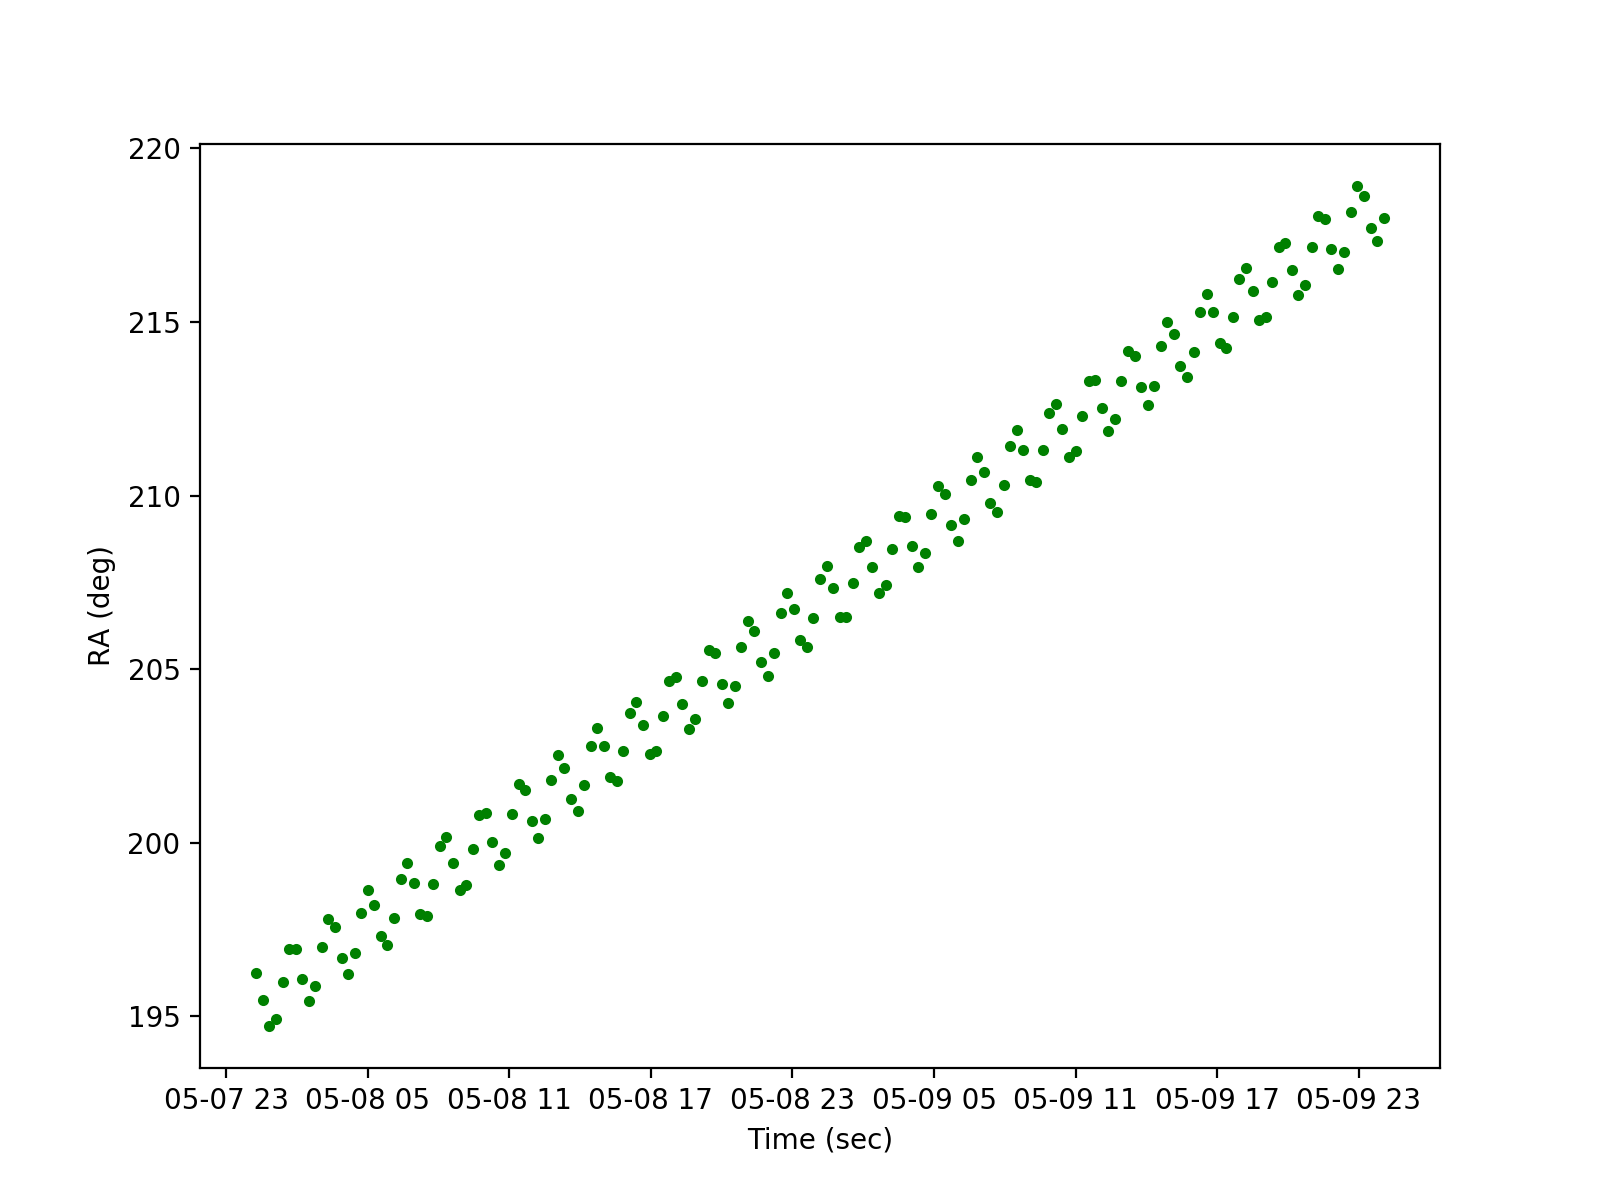

<IPython.core.display.Javascript object>


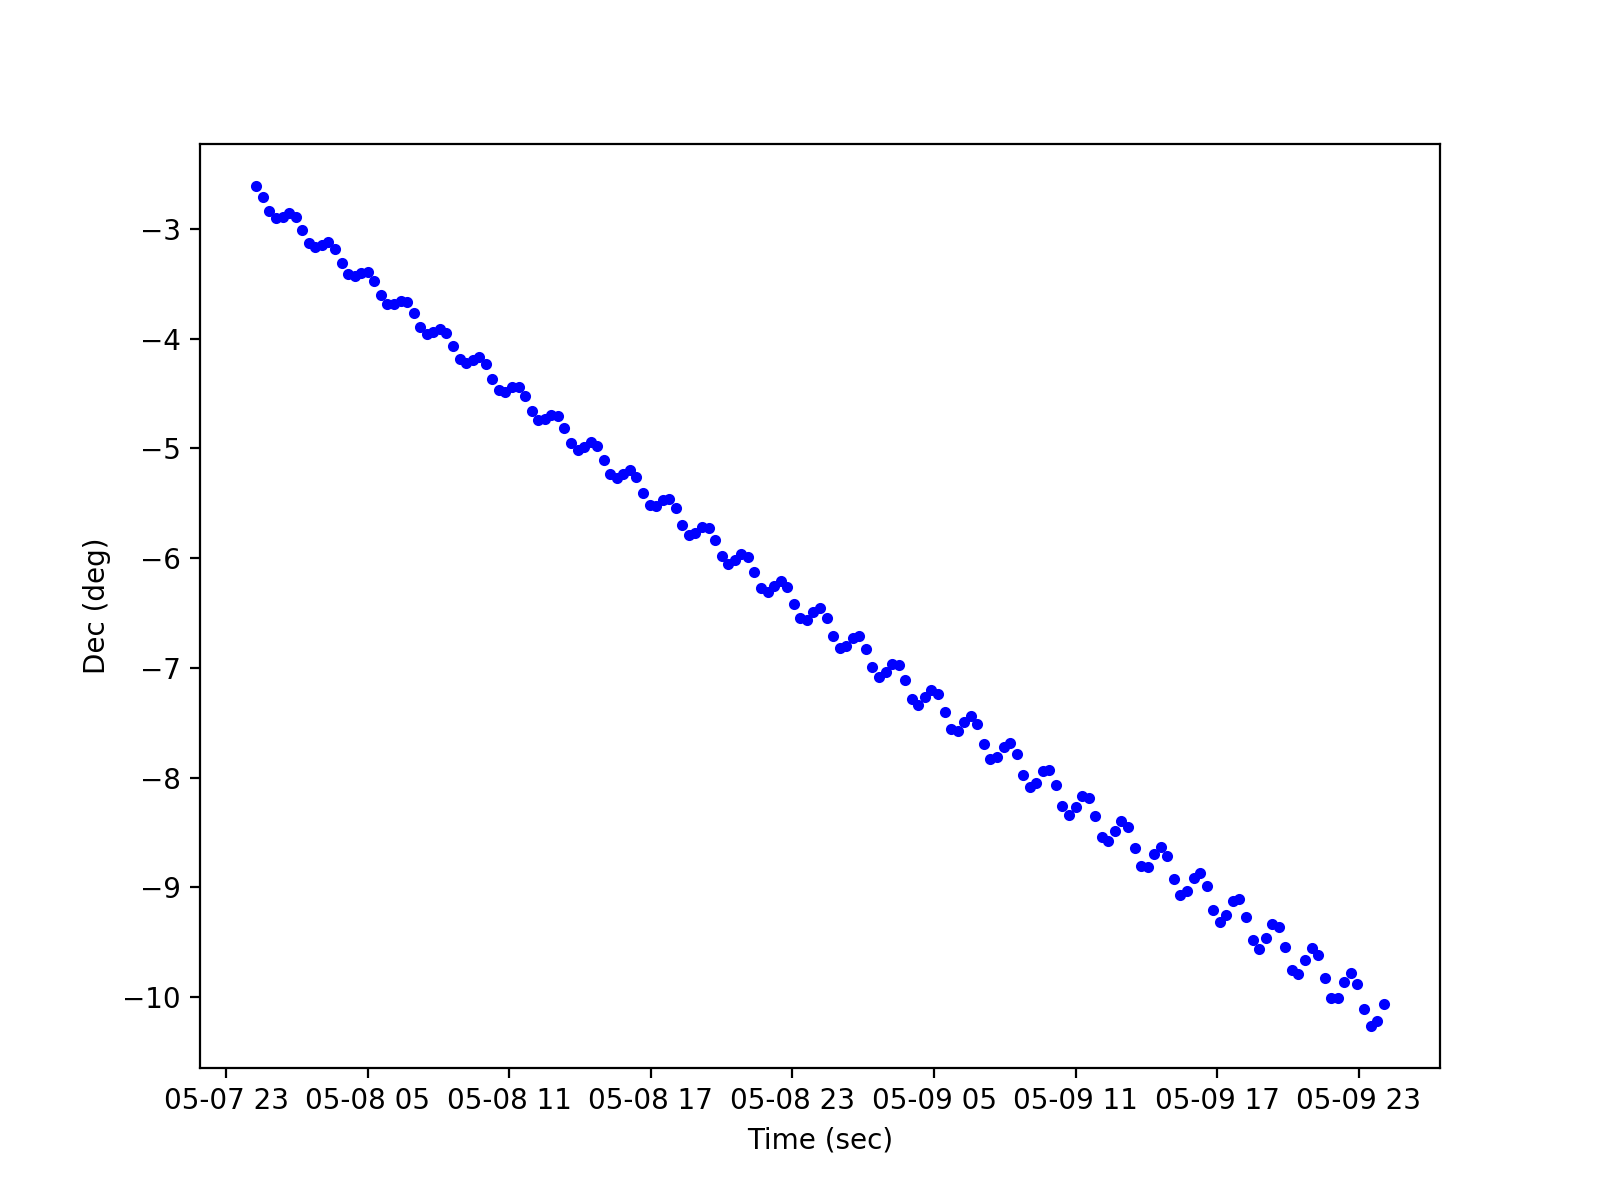

In [5]:
ax = plt.figure(112, figsize=(8, 6))
plt.plot(times, ra, 'g.')
plt.xlabel('Time (sec)')
plt.ylabel('RA (deg)')

ax = plt.figure(212, figsize=(8, 6))


plt.plot(times, dec, 'b.')
plt.xlabel('Time (sec)')
plt.ylabel('Dec (deg)')



In [76]:
from skyfield.api import EarthSatellite, load
from skyfield.vectorlib import VectorFunction

In [40]:
ts = load.timescale()
utc = Time(checktime)

In [47]:
tcheck = ts.from_astropy(utc)

Days between TLE entry and when you want to observe:  15


In [107]:
geometry = nustar +earth
nustar_bary = geometry.at(tcheck)
astrometric = nustar_bary.observe(moon)

In [111]:
ra, dec, dist = astrometric.radec()
print(ra.to(u.deg), dec.to(u.deg))

196.04185769811315 deg -2.5947629021463947 deg
